In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from google.colab import files
uploaded = files.upload()
import io

Saving charity_data.csv to charity_data.csv


In [2]:
application_df = pd.read_csv(io.StringIO(uploaded['charity_data.csv'].decode('utf-8')))

In [3]:
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_types_to_replace = ["T13","T12","T2", "T14","T25", "T15", "T29","T17"]
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [5]:
lower_classification = application_df['CLASSIFICATION'].value_counts().loc[lambda x : x<1000]
classifications_to_replace = lower_classification.index
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [6]:
df = pd.get_dummies(application_df)
df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'APPLICATION_TYPE_T9',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-

In [7]:
y = df["IS_SUCCESSFUL"].values
X = df.drop(["IS_SUCCESSFUL"],axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [8]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
nn = tf.keras.models.Sequential()
number_input_features = len(X_train[0])


nn.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim= number_input_features))
# First hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu"))
# Tgird hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 225       
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6071 - accuracy: 0.6808
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5669 - accuracy: 0.7222
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5600 - accuracy: 0.7230
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.7228
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.7242
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5532 - accuracy: 0.7261
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.7264
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5517 - accuracy: 0.7270
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5515 - accuracy: 0.7302
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5507 - accura

In [12]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5584 - accuracy: 0.7259 - 951ms/epoch - 4ms/step
Loss: 0.5584260821342468, Accuracy: 0.7259474992752075


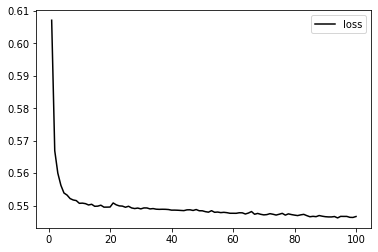

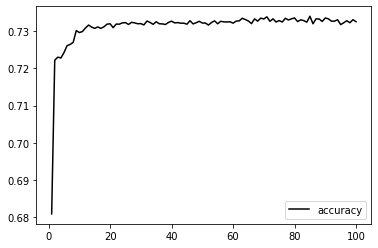

In [13]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss", color= "black")
history_df.plot(y="accuracy", color= "black")

In [14]:
y = df["IS_SUCCESSFUL"].values
X = df.drop(["IS_SUCCESSFUL"],axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [15]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
def create_model(hp):
    number_input_features = len(X_train[0])
    nn_model = tf.keras.models.Sequential()
    activation = hp.Choice('activation',['relu'])
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=number_input_features))

    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [17]:
!pip install keras_tuner
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 6.4 MB/s 
     |████████████████████████████████| 1.6 MB 47.0 MB/s 


In [18]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 01m 23s]
val_accuracy: 0.7189504504203796

Best val_accuracy So Far: 0.7322449088096619
Total elapsed time: 00h 21m 57s


In [19]:
top_hyper = tuner.get_best_hyperparameters(1)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 26, 'num_layers': 4, 'units_0': 6, 'units_1': 6, 'units_2': 16, 'units_3': 11, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


In [20]:
top_model = tuner.get_best_models(1)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5585 - accuracy: 0.7322 - 559ms/epoch - 2ms/step
Loss: 0.5585375428199768, Accuracy: 0.7322449088096619


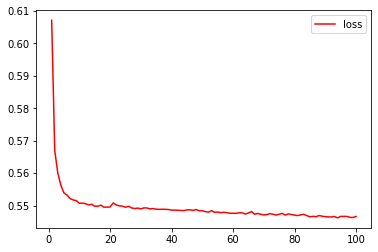

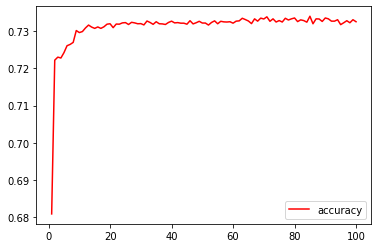

In [21]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss", color= "red")
history_df.plot(y="accuracy", color= "red")

In [22]:
nn_model = tf.keras.models.Sequential()
number_input_features = len(X_train[0])


nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim= number_input_features))
# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu"))
# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu"))
# Tgird hidden layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu"))
# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="tanh"))


# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 225       
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 5)                 30        
                                                                 
 dense_9 (Dense)             (None, 5)                 30        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [23]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.7311 - accuracy: 0.6528
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5656 - accuracy: 0.7246
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5595 - accuracy: 0.7269
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5571 - accuracy: 0.7285
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5559 - accuracy: 0.7282
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5546 - accuracy: 0.7297
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7303
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7294
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7303
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5531 - accura

In [25]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5584 - accuracy: 0.7259 - 684ms/epoch - 3ms/step
Loss: 0.5584260821342468, Accuracy: 0.7259474992752075


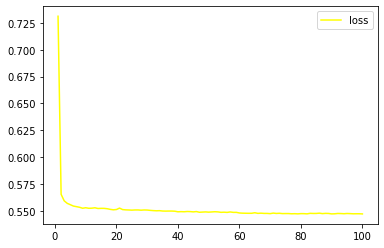

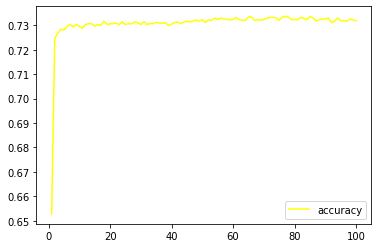

In [26]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss", color= "yellow")
history_df.plot(y="accuracy", color= "yellow")

In [27]:
model_json = nn.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
nn.save_weights("AlphabetSoupCharity_Optimisation.h5")
print("Saved model to disk")

Saved model to disk
